In [1]:
import importlib
#importlib.reload(mg)

In [23]:
import os
import glob
import formatting as fm
import graph_measures as gm
import df_objects as do
import chromatics
import theme_matching as tm
from IPython.display import Image, YouTubeVideo


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import clear_output

In [4]:
twelve_tones = fm.twelve_tones

Note=do.Note
measure=do.measure

In [5]:
resources = os.path.join(os.getcwd(),'resources')
os.path.exists(resources)

True

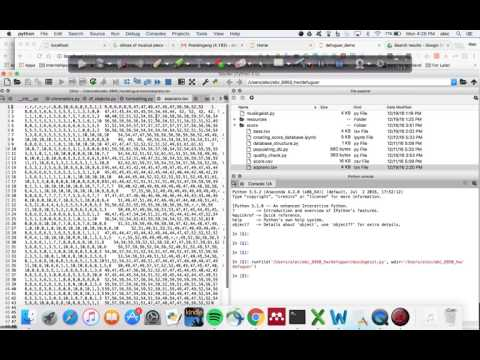

In [24]:
YouTubeVideo("8qrY7R4M0Qs", width=600)

# defuguer

# Fugue in C# Major, BWV 846
# by J.S. Bach

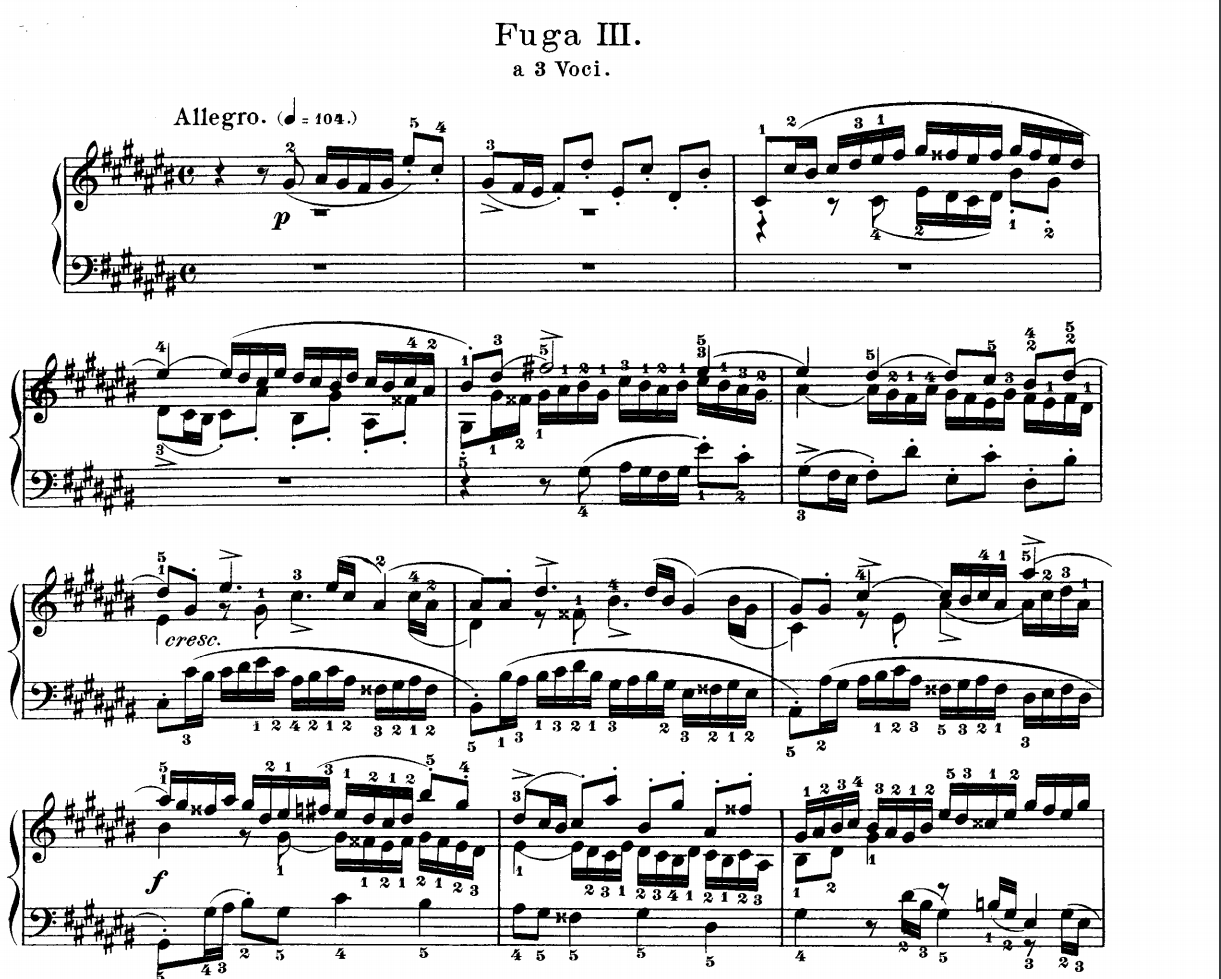

In [6]:
Image(os.path.join(resources,'bach1.png'))

# Input and Music Representation

This package requires a couple of different formats for the representation of the score. At a basic level, I use Schönberg's 0-index, base-12 system:

In [7]:
twelve_tones

{'A': 9,
 'A#': 10,
 'Ab': 8,
 'B': 11,
 'B#': 0,
 'Bb': 10,
 'C': 0,
 'C#': 1,
 'D': 2,
 'D#': 3,
 'Db': 1,
 'E': 4,
 'E#': 5,
 'Eb': 3,
 'F': 5,
 'F#': 6,
 'G': 7,
 'G#': 8,
 'Gb': 6,
 'R': 'R',
 'r': 'R'}

While this is simple enough, the challenge came in that I sometimes needed the measures to be written just as numbers between 0 and 11, but other times I needed to have the actual pitches. Sometimes it was helpful to have rhythm, but other times it wasn't. To solve this, I create a class Note:

In [8]:
middleC = Note(pitch='C',length=4,octave=4)

A Note has a number of different methods that can give me the note in the format I want:

In [9]:

print("As a string: \n",middleC.get_pitch())

print("\nAs an integer: \n", middleC.get_value())

print("\nRepresenting the rhythm: \n", middleC.realize())


print("\nOr the actual note on a keyboard: \n", middleC.abs_pitch())

As a string: 
 C

As an integer: 
 0

Representing the rhythm: 
 [0, 0, 0, 0]

Or the actual note on a keyboard: 
 39


Notes are organized into groups called measures. There are 16 16th notes in a 4/4 measure. I created a measure class to address similar issues that I had with Note:

In [10]:
measure = do.measure

In [11]:
test_measure = measure(numeric='r,r,r,r,r,r,8,8,10,8,6,8,5,5,1,1',tonality=1,measure_num=1,absolute='R,R,R,R,R,R,47,47,49,47,45,47,56,56,52,52')

Here are some methods:

In [12]:
print(test_measure.get_numeric(),'\n')
print(test_measure.get_retro(),'\n')
print(test_measure.invert(),'\n')
print(test_measure.transpose2C(),'\n')

['r', 'r', 'r', 'r', 'r', 'r', 8, 8, 10, 8, 6, 8, 5, 5, 1, 1] 

[1, 1, 5, 5, 8, 6, 8, 10, 8, 8, 'r', 'r', 'r', 'r', 'r', 'r'] 

['r', 'r', 'r', 'r', 'r', 'r', 8, 8, 6, 8, 10, 8, 11, 11, 3, 3] 

['r', 'r', 'r', 'r', 'r', 'r', 7, 7, 9, 7, 5, 7, 4, 4, 0, 0] 



# Data Formatting and Storage

# defuguer

# Main Goals: Visualisation, Chromaticism, and Providing a User Interface

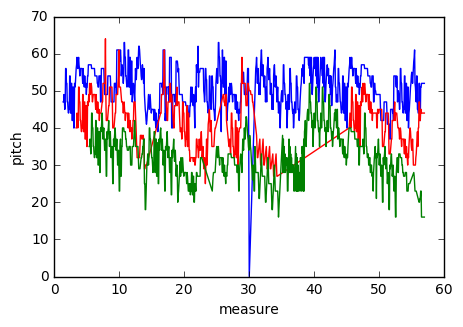

['soprano = blue', 'tenor = red', 'bass = green']


In [13]:
gm.graph_measures((1,56))

Intro:

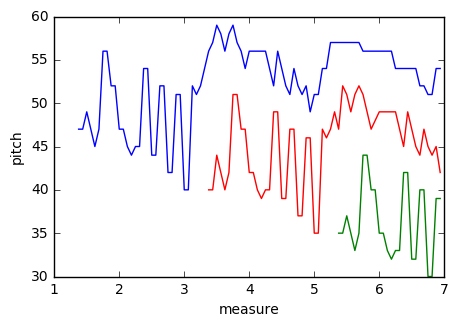

['soprano = blue', 'tenor = red', 'bass = green']


In [14]:
gm.graph_measures((1,6))

Beginning of Development Section, upper voices

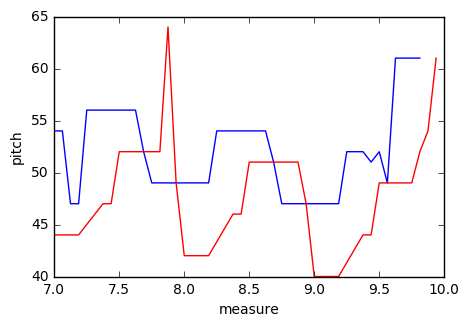

['soprano = blue', 'tenor = red']


In [15]:
gm.graph_measures((7,9),bass=False)

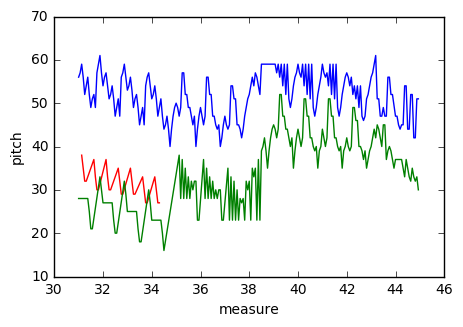

['soprano = blue', 'tenor = red', 'bass = green']


In [16]:
gm.graph_measures((31,44))

Final 6 measures

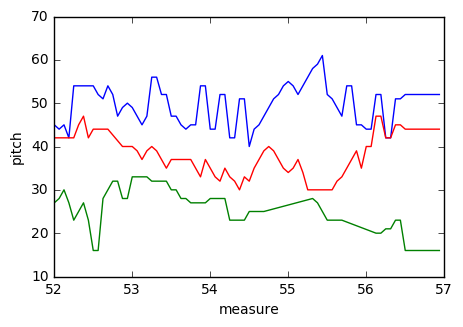

['soprano = blue', 'tenor = red', 'bass = green']


In [17]:
gm.graph_measures((52,56))

## Chromaticism

In tonal music, the notes used are determined by the piece's tonality. This means that most notes will be pulled from the primary (diatonic) key and certain relationships will exist between notes/chords. For example, in C major, most notes should be expected to belong the the c_major set described above.

Notes outside of the primary key sets are called "chromatic" tones. "Chromatic" implies color, and it can be seen as adding distinct, vivid colors to a painting. One purpose of chromaticism is to build tension and develop the "story" of a piece. This is especially true in the best kind of classical music, Germanic music. I want to see if there as an overall arch, similar to a story arch, that can be measured with chromaticism.


I wrote a function to test what percentage of notes belong to any given key:

In [18]:
chromatics.diatonic_tester(test_measure)

1.0

Most chromatic measure: 18


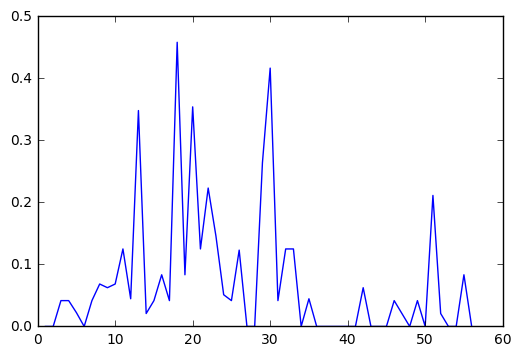

In [19]:
chromatics.graph_chromaticism((1,56))

Most chromatic measures: 11, 13, 18, 30, 51

Least chromatic: 0, 6, 27, 34, 36-40, 56

Using this graph, you can follow the ebb and flow of chromaticism in the piece. This can provide musical information that can be useful as a performer is interpreting various sections of the piece. For example, there is a very slight arch in the first 6 measures. At measure 6, the chromaticism returns to 0 and then shoots upward. These first 6 measures are the introduction, where each voice gets a turn at the main theme, the "subject". After that begins the development episode, where, as you would expect, the chromaticism is generally much higher.

The arches in this graph can be seen as climaxes. This may not be entirely intuitive to a performer reading from a score. This graph can thus be useful in identifying these important moments of chromaticism and the more docile, diatonic moments.

# Finding and identifying themes (beta)

After spending some time trying to get this to work, I decided to give up. This could really be a entire project on its own. In theory, here is how it should work:

Throughout a piece, a few fragments of musical material are recurring themes that give the piece unity. They may appear in the same form every time, but more likely they will be transposed, inverted, in retrograde form, or cut apart.

This part of the project aimed to take hand-picked musical motives/themes and find instances of them in the piece, regardless of what form they are in. However, complications with formatting mean that this would be a difficult task that goes beyond the scope of this project.

The measures soprano1 and tenor3 are two examples of the main theme, called a 'subject', that are slightly different. This function should identify them both as matches.

In [ ]:
soprano1 = test_measure
subject = '7,7,9,7,5,7,4,4,0,0'
tenor3 = fm.tsv2Measure('tenor',3)
print(test_measure.get_numeric(), '\n', tenor3.get_numeric())

It worked with soprano1:

In [ ]:
tm.theme_matcher(subject,soprano1)

But not tenor3

# User Interface: musikGeist

In [20]:
import musikgeist as mg

Tschüß!


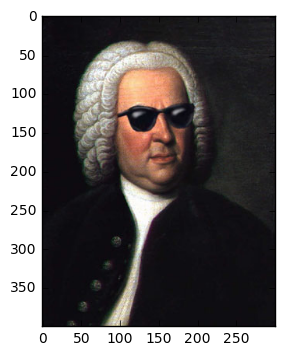

In [21]:

mg.musikGeist()